# Exploring a demonstration

This notebook shows several standard ways to interact with the demonstrations stored into the exp/run directories. 

In [1]:
import sys
sys.path.append("..")
from exp_run_config import Config
Config.PROJECTNAME = "BerryPicker"

import matplotlib.pyplot as plt
import random
import pprint
import torch

from demonstration import Demonstration, list_demos, select_demo, get_simple_transform
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
experiment = "demonstration"
run = "freeform"
# run = "random-both-cameras"
exp = Config().get_experiment(experiment, run)

***ExpRun**: Experiment default config C:\Users\lboloni\Documents\Code\_Checkouts\BerryPicker\src\experiment_configs\demonstration\_defaults_demonstration.yaml was empty, ok.
***ExpRun**: No system dependent experiment file
	 G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\experiment-config\LotziYoga\demonstration\freeform_sysdep.yaml,
	 that is ok, proceeding.
***ExpRun**: Configuration for exp/run: demonstration/freeform successfully loaded


### Read out all the demonstrations from a run

In [5]:
# read out all the demonstrations from a run
demos = list_demos(exp)
pprint.pprint(demos)

['2024_12_26__16_40_20',
 '2024_12_26__16_44_06',
 '2025_06_01__10_53_40',
 'testing',
 'testing2']


In [6]:
#demoname = select_demo(exp, force_name="testing")
demoname = select_demo(exp)
print(f"You selected demo with name: {demoname}")

A pop up dialog will appear now. Enter the number of demonstration.
	0: 2024_12_26__16_40_20
	1: 2024_12_26__16_44_06
	2: 2025_06_01__10_53_40
	3: testing
	4: testing2
You chose demonstration: 2025_06_01__10_53_40
You selected demo with name: 2025_06_01__10_53_40


###  Read out all the pictures in the demonstration

In [7]:
demo = Demonstration(exp, demoname)
print(demo)


{'actions': [],
 'annotations': [],
 'demo': '2025_06_01__10_53_40',
 'demo_dir': WindowsPath('c:/Users/lboloni/Documents/Code/_TempData/BerryPicker-experiments/demonstration/freeform/2025_06_01__10_53_40'),
 'exp': Experiment:
    cameras:
      all:
        fps: 10
        height: 256
        width: 256
    data_dir: c:\Users\lboloni\Documents\Code\_TempData\BerryPicker-experiments\demonstration\freeform
    exp_run_sys_indep_file: C:\Users\lboloni\Documents\Code\_Checkouts\BerryPicker\src\experiment_configs\demonstration\freeform.yaml
    experiment_name: demonstration
    name: freeform
    run_name: freeform
    subrun_name: null
,
 'metadata': {'cameras': ['dev0'],
              'maxsteps': 106,
              'stored_as_images': True,
              'stored_as_video': False},
 'videocap': {}}


Cameras found: ['dev0']
There are 106 steps in this demonstration
Random image, read as anything
Chosen camera dev0 image 10


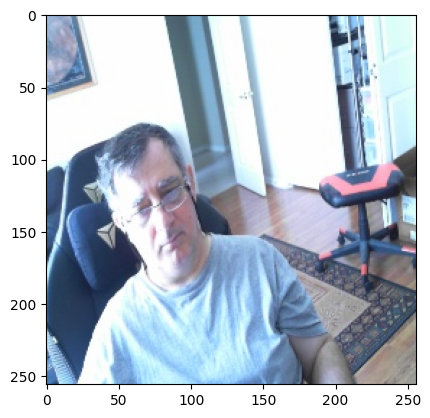

In [8]:
print(f"Cameras found: {demo.metadata['cameras']}")
print(f"There are {demo.metadata['maxsteps']} steps in this demonstration")

# if demo.metadata["stored_as_images"]:
    # pick and show a random image from a random camera
print("Random image, read as anything")
cam = random.choice(demo.metadata["cameras"])
imgno = random.randint(0, demo.metadata["maxsteps"])
print(f"Chosen camera {cam} image {imgno}")

transform = get_simple_transform()

sensor_readings, image = demo.get_image(imgno, camera=cam, device=device, transform=transform)
fig, ax = plt.subplots()
ax.imshow(image)


### Compare the same image from the video and the image

In [24]:
if demo.metadata["stored_as_images"] and demo.metadata["stored_as_video"]:
    imgno = random.randint(0, demo.metadata["maxsteps"])
    print(f"Image number: {imgno}")
    vid_tensor, vid_image = demo.get_image_from_video(imgno, camera=cam, device=device, transform=transform)
    img_tensor, img_image = demo.get_image(imgno+1, camera=cam, device=device, transform=transform)
    fig, [ax1, ax2] = plt.subplots(1,2)
    ax1.imshow(img_image)
    ax1.set_title("Image from image file")
    ax2.imshow(vid_image)
    ax2.set_title("Image from video file")
    print("Difference between image and video tensors")
    print(vid_tensor - img_tensor)
else:
    print("This demo does not have both image and video files")


This demo does not have both image and video files


### Example of how to generate video files from the image files
Note that this will delete the image files.

In [8]:
# demo.move_to_video(delete_img_files=True)
demo.move_to_video(delete_img_files=False)

***Demonstration***: moving to video started
*** Demonstration***: moving to video done


In [9]:
### How to access the actions
imgno = random.randint(0, demo.metadata["maxsteps"])
pprint.pprint(demo.actions[imgno])
a = demo.get_action(imgno)
print(f"Action: {a}")

{'rc-angle-target': {'0': 96.93000683292419,
                     '1': 97.0,
                     '2': 118.0,
                     '3': 65.0,
                     '4': 83.77005893939376},
 'rc-position-target': {'distance': 4.928636147035661,
                        'gripper': 49.98829902475352,
                        'heading': 6.930006832924192,
                        'height': 1.0297343863692672,
                        'wrist_angle': -89.72921971250938,
                        'wrist_rotation': 83.77005893939376},
 'rc-pulse-target': {'0': 1617.0,
                     '1': 1537.0,
                     '2': 1811.0,
                     '3': 1222.0,
                     '4': 1430.0,
                     '5': 1750.175514628697},
 'time': 378}
Action: [4.928636147035661, 49.98829902475352, 6.930006832924192, 1.0297343863692672, -89.72921971250938, 83.77005893939376]
